In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **LOAD Dataset**

In [ ]:
#To display max. columns

pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the Dataset.

df = pd.read_csv('/content/gurgaonrealestate_missingvalue_updated.csv')

In [ ]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38


# **Outlier Detection & Handling**

**price Column**

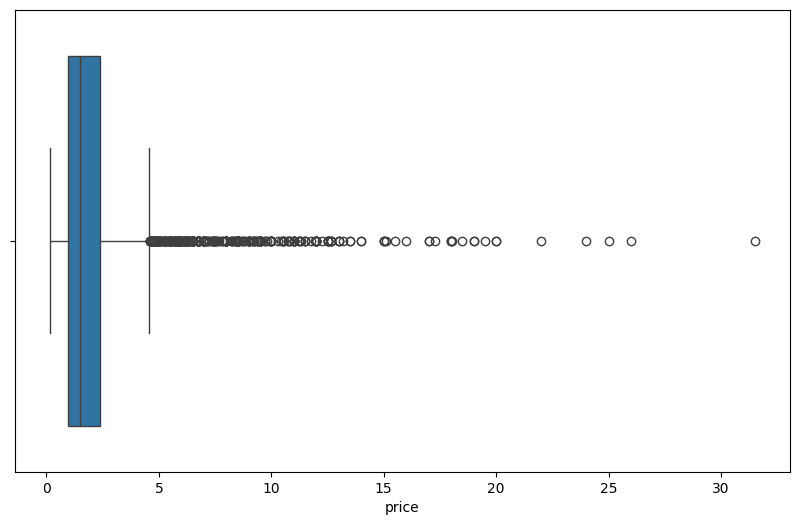

In [ ]:
#Boxplot of price

plt.figure(figsize = (10,6))
sns.boxplot(x=df['price'])
plt.show()

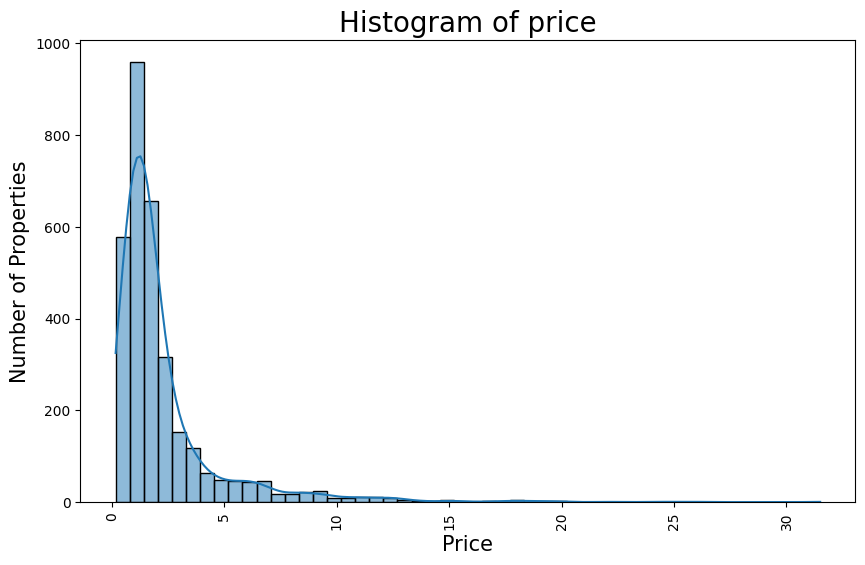

In [ ]:
#Plotting histogram of price

plt.figure(figsize = (10,6))
sns.histplot(df['price'], kde=True, bins=50)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price', fontsize=15)
plt.title('Histogram of price', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Calculate the IQR for the 'price' column

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifyng outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

#No.of Outliers
num_outliers = len(outliers)
num_outliers

347

In [ ]:
#Statiscal Summary of Outliers

outliers_price_stats = outliers['price'].describe()
outliers_price_stats

count    347.000000
mean       8.301917
std        3.872949
min        4.600000
25%        5.750000
50%        7.000000
75%        9.500000
max       31.500000
Name: price, dtype: float64

In [ ]:
#Sorting the price values

outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
709,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,7,9,3+,3.0,Moderately Old,9000.0,1,1,1,1,0,2,74
2121,house,dlf city plots,sector 26,26.00,57206.0,6,7,3+,2.0,New Property,4545.0,1,1,0,1,1,1,138
1433,house,suncity township,sector 54,25.00,31111.0,4,4,3+,2.0,Moderately Old,8036.0,1,1,1,1,0,0,0
2577,house,emaar the palm springs,sector 54,24.00,600000.0,5,5,2,1.0,Old Property,400.0,1,1,0,1,0,1,122
2267,house,vipul tatvam villa,sector 48,22.00,26667.0,5,6,3,3.0,Moderately Old,8250.0,0,1,0,0,0,0,54
757,house,dlf city plots,sector 26,20.00,44265.0,16,20,3+,4.0,New Property,4518.0,1,1,1,1,0,1,153
1790,house,luxury dlf city floors,sector 26,20.00,48889.0,16,16,3+,4.0,New Property,4091.0,0,1,0,0,0,1,31
836,house,vipul tatvam villa,sector 48,19.50,22222.0,5,6,3,2.0,Moderately Old,8775.0,1,1,1,1,0,1,110
473,house,emaar mgf marbella,sector 66,19.00,31666.0,5,6,3+,3.0,Relatively New,6667.0,0,1,1,1,0,1,110
1297,house,dlf city plots,sector 26,19.00,42054.0,6,6,3,2.0,Relatively New,4518.0,1,1,0,0,0,1,121


In [ ]:
#Here we dont use any technique to handle outliers because they are not potential outliers as they are all houses with many bedrooms,bathrooms and other rooms with a good luxury score and most of them are furnished also.

**price_per_sqft Column**

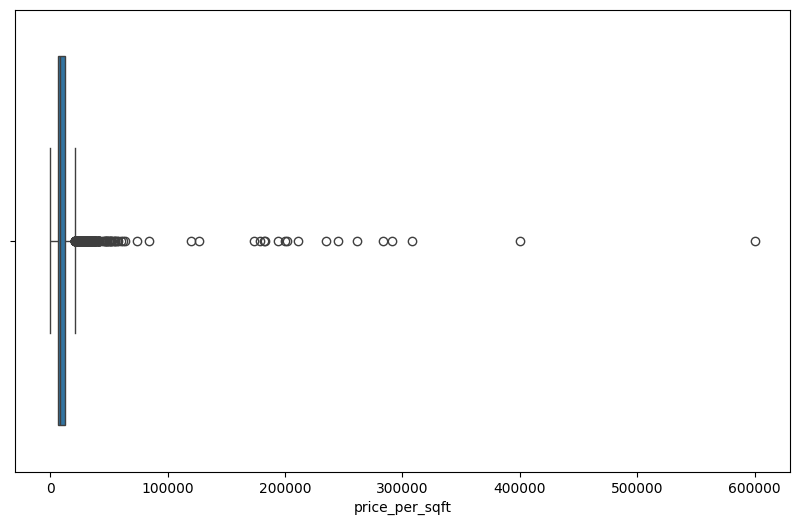

In [ ]:
#Boxplot of price_per_sqft

plt.figure(figsize = (10,6))
sns.boxplot(x=df['price_per_sqft'])
plt.show()

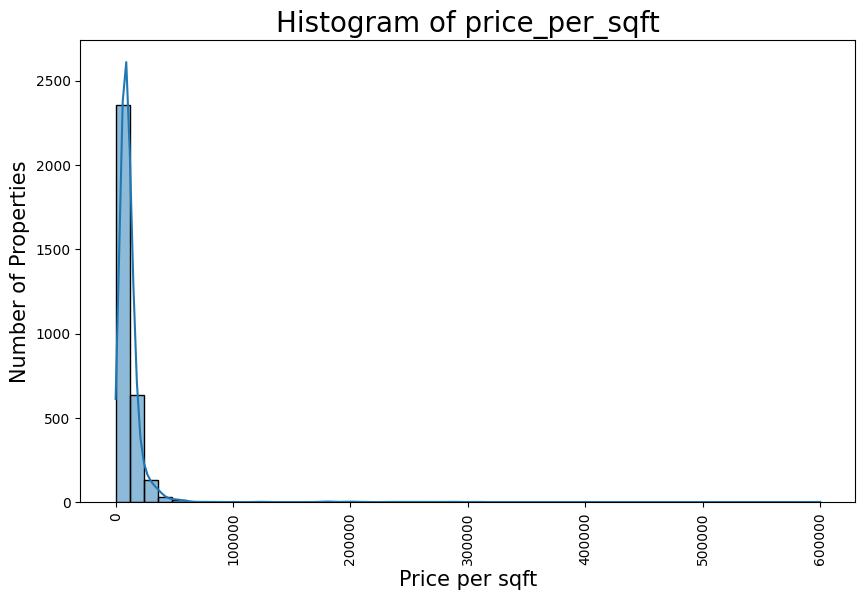

In [ ]:
#Plotting histogram of price_per_sqft

plt.figure(figsize = (10,6))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)

#Adding labels and title
plt.ylabel('Number of Properties', fontsize=15)
plt.xlabel('Price per sqft', fontsize=15)
plt.title('Histogram of price_per_sqft', fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#Calculate the IQR for the 'price_per_sqft' column

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

#Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifyng outliers
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

#No.of Outliers
num_outliers = len(outliers)
num_outliers

252

In [ ]:
#Statiscal Summary of Outliers

outliers_price_per_sqft_stats = outliers['price_per_sqft'].describe()
outliers_price_per_sqft_stats

count       252.000000
mean      46492.407906
std       62922.305094
min       20900.000000
25%       24569.000000
50%       29587.000000
75%       37184.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [ ]:
#Finding outliers

df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
199,house,rk excelo,sector 12,0.60,120000.0,5,3,2,3.0,Moderately Old,30.0,0,0,0,0,1,0,0
297,house,unitech nirvana birch court,sector 50,7.10,283333.0,3,3,3,1.0,Moderately Old,251.0,0,1,0,0,0,0,49
333,house,cloudnine cottages,sohna road,5.50,55000.0,3,3,0,1.0,Moderately Old,1000.0,0,0,0,0,0,0,0
583,house,emaar mgf marbella,sector 66,18.00,55556.0,4,4,3+,3.0,Moderately Old,3240.0,1,1,0,1,0,2,75
751,house,ardee city,sector 52,5.50,183333.0,9,9,3+,3.0,Moderately Old,300.0,0,1,0,1,1,1,26
843,house,uppal southend,sector 49,6.75,290948.0,12,12,3+,3.0,Moderately Old,232.0,1,1,0,1,1,1,49
887,house,dlf the grove,sector 54,5.70,211111.0,4,4,0,1.0,Undefined,270.0,0,0,0,0,0,0,46
1076,house,vipul tatvam villa,sector 48,7.25,201388.0,4,4,3,2.0,Relatively New,360.0,1,1,1,1,0,1,103
1091,house,not applicable,sector 4,0.80,54794.0,5,4,3,3.0,Under Construction,146.0,0,0,0,0,0,0,0
1142,house,ansal api esencia,sector 67,1.85,74000.0,3,3,3,1.0,Undefined,278.0,0,0,0,0,0,0,49


In [ ]:
#Removing Outliers

df = df[df['price_per_sqft'] <= 50000]

In [ ]:
df.shape

(3158, 18)

**built_up_area Column**

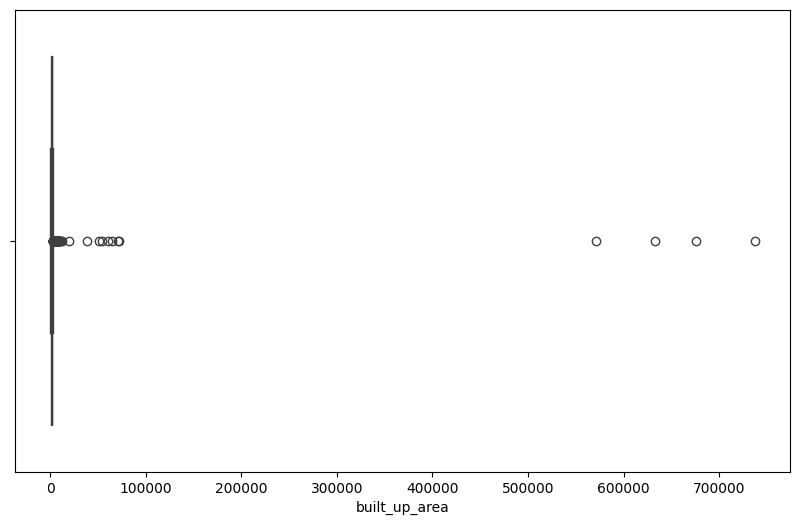

In [ ]:
#Boxplot of built_up_area

plt.figure(figsize = (10,6))
sns.boxplot(x=df['built_up_area'])
plt.show()

In [ ]:
#Calculate the IQR for the 'built_up_area' column

Q1 = df['built_up_area'].quantile(0.25)
Q3 = df['built_up_area'].quantile(0.75)
IQR = Q3 - Q1

#Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifyng outliers
outliers = df[(df['built_up_area'] < lower_bound) | (df['built_up_area'] > upper_bound)]

#No.of Outliers
num_outliers = len(outliers)
num_outliers

In [ ]:
#Finding Outliers

df[df['built_up_area']>20000]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2,flat,pyramid elite,sector 86,0.46,79.0,2,2,1,0.0,Under Construction,64601.0,0,0,0,0,0,0,15
94,flat,signature the serenas,sohna road,0.28,57.0,1,1,2,1.0,Relatively New,54234.0,1,0,0,0,0,0,37
966,flat,rof ananda,sector 95,0.38,58.0,3,2,1,12.0,Relatively New,71569.0,0,0,0,0,0,0,51
1526,flat,rof ananda,sector 95,0.38,58.0,2,2,2,10.0,New Property,71699.0,1,0,0,0,0,0,15
1818,flat,godrej air,sector 85,2.50,1379.0,4,5,3+,16.0,Under Construction,20136.0,1,0,0,1,1,1,44
2008,flat,rof ananda,sector 95,0.33,60.0,2,2,1,13.0,Relatively New,61019.0,0,0,0,0,0,0,37
2132,flat,rof ananda,sector 95,0.21,61.0,1,1,1,13.0,Relatively New,38223.0,0,0,0,0,0,0,68
3060,flat,ramsons kshitij,sector 95,0.24,53.0,2,2,1,10.0,Relatively New,51073.0,0,0,0,0,1,0,33


In [ ]:
#Removing Outliers

df = df[df['built_up_area'] <= 20000]

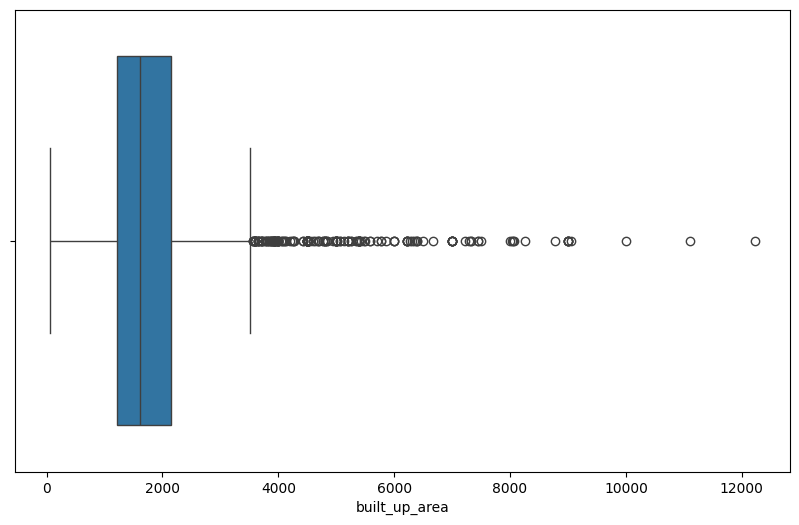

In [ ]:
#Boxplot of built_up_area

plt.figure(figsize = (10,6))
sns.boxplot(x=df['built_up_area'])
plt.show()

In [ ]:
df.shape

(3142, 18)

**bedroom Column**

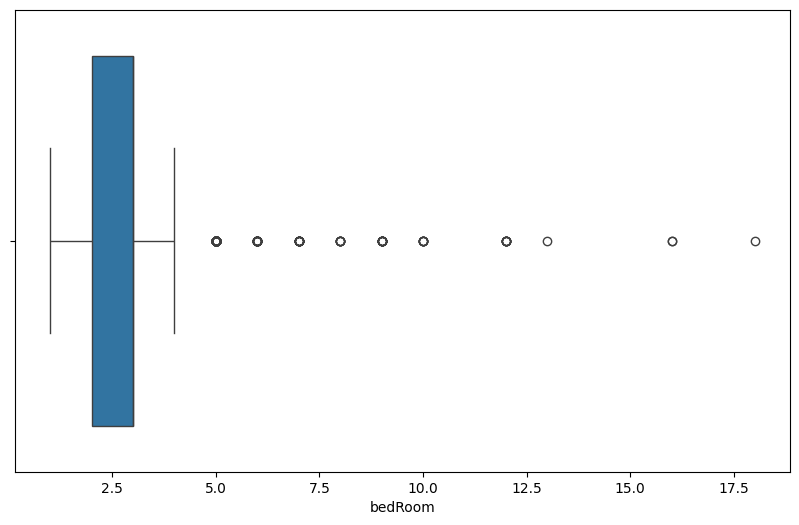

In [ ]:
#Boxplot of bedRoom

plt.figure(figsize = (10,6))
sns.boxplot(x=df['bedRoom'])
plt.show()

In [ ]:
#Statistical Summary

df['bedRoom'].describe()

count    3142.000000
mean        3.033100
std         1.240636
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        18.000000
Name: bedRoom, dtype: float64

In [ ]:
#Outlier Detection

df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1184,house,private house,sector 55,7.05,46906.0,18,18,3+,4.0,Relatively New,1503.0,0,0,0,0,1,2,57
757,house,dlf city plots,sector 26,20.00,44265.0,16,20,3+,4.0,New Property,4518.0,1,1,1,1,0,1,153
1790,house,luxury dlf city floors,sector 26,20.00,48889.0,16,16,3+,4.0,New Property,4091.0,0,1,0,0,0,1,31
1393,house,dlf city plots phase 3,sector 24,5.00,34083.0,13,13,3+,4.0,New Property,1467.0,0,0,0,1,0,2,91
1090,house,uppal southend,sector 49,6.75,32328.0,12,12,3+,3.0,Moderately Old,2088.0,1,1,0,1,1,1,49
1123,house,uppal southend,sector 49,6.75,31915.0,12,12,3+,3.0,Moderately Old,2115.0,0,0,0,0,1,0,49
1196,house,luxury dlf city floors,sector 26,8.25,45833.0,12,12,3+,4.0,New Property,1800.0,0,1,0,0,0,1,105
1653,house,independent house sector 45,sector 40,9.00,38022.0,12,12,3,4.0,New Property,9000.0,0,1,0,0,0,1,71
2326,house,dlf city phase 1,sector 26,9.25,47803.0,12,12,3+,4.0,New Property,7000.0,0,1,0,1,0,1,43
2348,house,floor wise designer kothi,sector 25,13.00,48148.0,12,16,3+,4.0,New Property,2700.0,1,1,1,1,0,1,144


**bathroom Column**

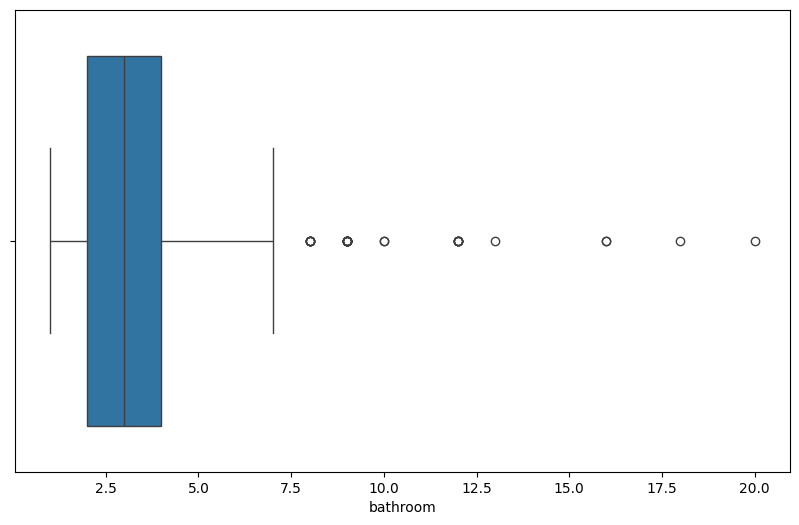

In [ ]:
#Boxplot of bathroom

plt.figure(figsize = (10,6))
sns.boxplot(x=df['bathroom'])
plt.show()

In [ ]:
#Statistical Summary

df['bathroom'].describe()

count    3142.000000
mean        3.174729
std         1.405301
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: bathroom, dtype: float64

In [ ]:
#Outlier Detection

df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
757,house,dlf city plots,sector 26,20.00,44265.0,16,20,3+,4.0,New Property,4518.0,1,1,1,1,0,1,153
1184,house,private house,sector 55,7.05,46906.0,18,18,3+,4.0,Relatively New,1503.0,0,0,0,0,1,2,57
1790,house,luxury dlf city floors,sector 26,20.00,48889.0,16,16,3+,4.0,New Property,4091.0,0,1,0,0,0,1,31
2348,house,floor wise designer kothi,sector 25,13.00,48148.0,12,16,3+,4.0,New Property,2700.0,1,1,1,1,0,1,144
1393,house,dlf city plots phase 3,sector 24,5.00,34083.0,13,13,3+,4.0,New Property,1467.0,0,0,0,1,0,2,91
1090,house,uppal southend,sector 49,6.75,32328.0,12,12,3+,3.0,Moderately Old,2088.0,1,1,0,1,1,1,49
1123,house,uppal southend,sector 49,6.75,31915.0,12,12,3+,3.0,Moderately Old,2115.0,0,0,0,0,1,0,49
1196,house,luxury dlf city floors,sector 26,8.25,45833.0,12,12,3+,4.0,New Property,1800.0,0,1,0,0,0,1,105
1653,house,independent house sector 45,sector 40,9.00,38022.0,12,12,3,4.0,New Property,9000.0,0,1,0,0,0,1,71
2326,house,dlf city phase 1,sector 26,9.25,47803.0,12,12,3+,4.0,New Property,7000.0,0,1,0,1,0,1,43


**balcony Column**

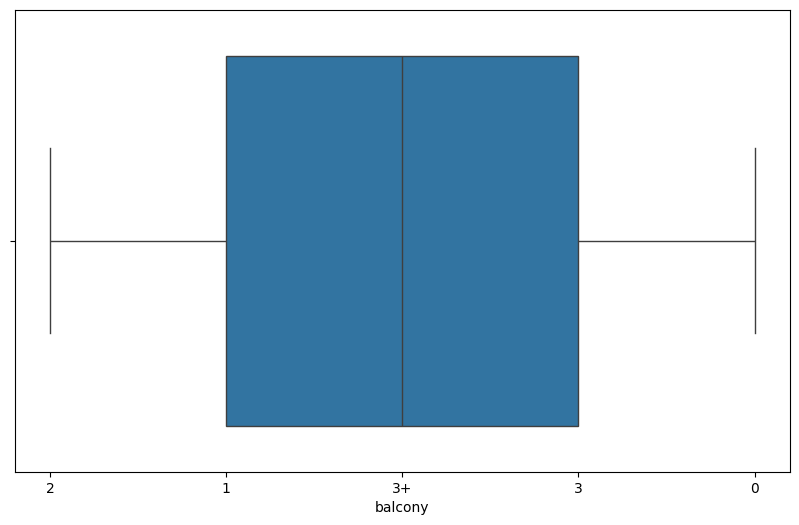

In [ ]:
#Boxplot of balcony

plt.figure(figsize = (10,6))
sns.boxplot(x=df['balcony'])
plt.show()

**floorNum Column**

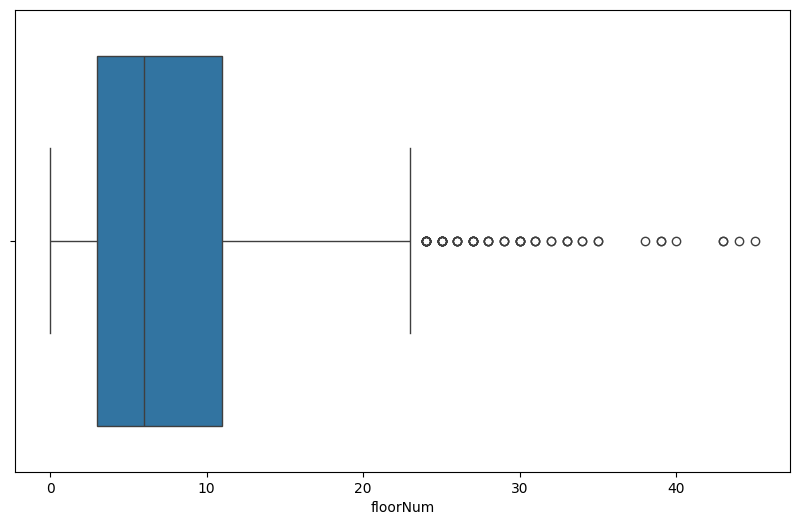

In [ ]:
#Boxplot of floorNum

plt.figure(figsize = (10,6))
sns.boxplot(x=df['floorNum'])
plt.show()

In [ ]:
#Statistical Summary

df['floorNum'].describe()

count    3142.000000
mean        7.450668
std         6.106136
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        45.000000
Name: floorNum, dtype: float64

In [ ]:
#Outlier Detection

df[df['floorNum'] > 20].sort_values('floorNum',ascending=False)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
26,flat,m3m heights,sector 65,2.86,14000.0,3,3,3,45.0,Under Construction,2267.00,0,1,0,0,0,0,48
312,flat,m3m heights,sector 65,2.78,15200.0,3,3,3,44.0,Undefined,1829.00,0,0,0,0,0,0,56
2252,flat,m3m skycity,sector 65,2.10,16030.0,2,2,2,43.0,New Property,1186.00,0,0,0,0,0,0,127
1723,flat,m3m skycity,sector 65,2.85,15590.0,3,3,3,43.0,Under Construction,1828.00,0,0,0,0,0,1,115
2919,flat,m3m heights,sector 65,1.90,13991.0,2,2,2,40.0,Undefined,1358.00,0,0,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,flat,ats triumph,sector 104,2.63,9563.0,4,4,3+,21.0,Relatively New,2953.00,0,1,0,0,0,1,161
578,flat,experion windchants,sector 112,3.75,13383.0,3,3,2,21.0,Relatively New,2225.56,0,1,0,0,0,1,159
2678,flat,ss the leaf,sector 85,1.07,6524.0,2,2,3,21.0,Relatively New,1484.00,0,0,0,1,0,0,67
2192,flat,ats kocoon,sector 109,1.70,9742.0,3,3,3,21.0,Moderately Old,1550.00,0,0,0,0,0,0,49


In [ ]:
#Removing Outliers

df = df.drop(df[(df['property_type'] == 'house') & (df['floorNum'] > 20)].index)

In [ ]:
df.shape

(3142, 18)

In [ ]:
df.to_csv('gurgaonrealestate_outlierhandling.csv',index=False)